# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

count_one = 0
set_one = 1

In [4]:
print(citipy)
print(output_data_file)

<module 'citipy.citipy' from 'C:\\Users\\baboo\\anaconda3\\lib\\site-packages\\citipy\\citipy.py'>
output_data/cities.csv


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | nederland
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | tooele
Processing Record 4 of Set 1 | nelson bay
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | oni
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | naryan-mar
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | alofi
Processing Record 15 of Set 1 | ternate
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | dauphin
Processing Record 19 of Set 1 | meulaboh
Processing Record 20 of Set 1 | kahului
City not found. Skipping...
Processing Record 21 of Set 1 | newington
City not found. Skipping...
Processing Record 22 of Set 1 | tuatapere
Processing Record 23 of Set 1 | mandalgovi
Pr

Processing Record 38 of Set 4 | nanortalik
Processing Record 39 of Set 4 | porto velho
Processing Record 40 of Set 4 | pontivy
Processing Record 41 of Set 4 | nichinan
Processing Record 42 of Set 4 | dubbo
Processing Record 43 of Set 4 | mys shmidta
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | ponnani
City not found. Skipping...
Processing Record 46 of Set 4 | santa maria
City not found. Skipping...
Processing Record 47 of Set 4 | tura
City not found. Skipping...
Processing Record 48 of Set 4 | laurel
Processing Record 49 of Set 4 | guhagar
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | yerbogachen
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | north bend
City not found. Skipping...
Processing Record 5 of Set 5 | malko tarnovo
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 5 | isabela
Processing Record 7 of Set 5 | peniche
City not found. Skipping.

Processing Record 25 of Set 8 | touros
Processing Record 26 of Set 8 | deh rawud
Processing Record 27 of Set 8 | agde
Processing Record 28 of Set 8 | vygonichi
Processing Record 29 of Set 8 | mitsamiouli
Processing Record 30 of Set 8 | guarapari
Processing Record 31 of Set 8 | sao miguel do iguacu
Processing Record 32 of Set 8 | searcy
Processing Record 33 of Set 8 | lingao
Processing Record 34 of Set 8 | brae
Processing Record 35 of Set 8 | houma
Processing Record 36 of Set 8 | mattru
Processing Record 37 of Set 8 | mabaruma
City not found. Skipping...
Processing Record 38 of Set 8 | port hedland
Processing Record 39 of Set 8 | saint-georges
Processing Record 40 of Set 8 | benxi
Processing Record 41 of Set 8 | honningsvag
Processing Record 42 of Set 8 | adjumani
City not found. Skipping...
Processing Record 43 of Set 8 | san jeronimo
Processing Record 44 of Set 8 | urdoma
Processing Record 45 of Set 8 | marawi
City not found. Skipping...
Processing Record 46 of Set 8 | jardim
Processi

Processing Record 14 of Set 12 | lavumisa
Processing Record 15 of Set 12 | zhigansk
Processing Record 16 of Set 12 | launceston
Processing Record 17 of Set 12 | takoradi
Processing Record 18 of Set 12 | riyadh
Processing Record 19 of Set 12 | araguacu
City not found. Skipping...
Processing Record 20 of Set 12 | lata
Processing Record 21 of Set 12 | ohafia
Processing Record 22 of Set 12 | half moon bay
Processing Record 23 of Set 12 | zhangye
Processing Record 24 of Set 12 | ranong
Processing Record 25 of Set 12 | boa vista
City not found. Skipping...
Processing Record 26 of Set 12 | nema
Processing Record 27 of Set 12 | birao
Processing Record 28 of Set 12 | san lorenzo
Processing Record 29 of Set 12 | yokadouma
Processing Record 30 of Set 12 | wellington
Processing Record 31 of Set 12 | tchollire
Processing Record 32 of Set 12 | dongsheng
Processing Record 33 of Set 12 | batagay
Processing Record 34 of Set 12 | isangel
Processing Record 35 of Set 12 | pucara
--------------------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df = {"City":city_two, "Cloudiness":cloudinesses, "Country":countries, "Date":dates, "Humidity":humidities, 
               "Lat":lats, "Lng":lngs, "Max Temp":max_temps, "Wind Speed":wind_speeds}
weather_df = pd.DataFrame(weather_df)
weather_df.count()

City          574
Cloudiness    574
Country       574
Date          574
Humidity      574
Lat           574
Lng           574
Max Temp      574
Wind Speed    574
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
weather_df.loc[weather_df["Humidity"] <= 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nederland,75,US,1593461328,74,29.97,-93.99,89.60,18.34
1,ushuaia,75,AR,1593461328,69,-54.80,-68.30,35.60,8.05
2,tooele,90,US,1593461328,51,40.53,-112.30,59.00,5.82
3,nelson bay,85,NZ,1593461328,88,-41.28,173.28,42.01,4.00
4,tuktoyaktuk,40,CA,1593461329,54,69.45,-133.04,55.40,5.82
...,...,...,...,...,...,...,...,...,...
569,tchollire,100,CM,1593461421,90,8.40,14.17,71.87,3.18
570,dongsheng,2,CN,1593461421,62,39.82,109.98,63.43,10.83
571,batagay,75,RU,1593461422,41,67.63,134.63,57.99,5.77
572,isangel,40,VU,1593461422,88,-19.55,169.27,68.00,13.89


In [23]:
#  Get the indices of cities that have humidity over 100%.

# There are no cities with humidity > 100%

In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.copy()
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nederland,75,US,1593461328,74,29.97,-93.99,89.60,18.34
1,ushuaia,75,AR,1593461328,69,-54.80,-68.30,35.60,8.05
2,tooele,90,US,1593461328,51,40.53,-112.30,59.00,5.82
3,nelson bay,85,NZ,1593461328,88,-41.28,173.28,42.01,4.00
4,tuktoyaktuk,40,CA,1593461329,54,69.45,-133.04,55.40,5.82


In [25]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

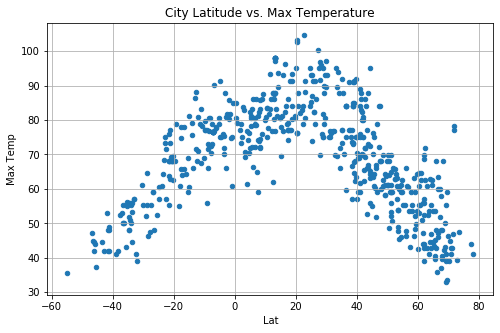

In [31]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,5),
              title="City Latitude vs. Max Temperature")
plt.show()

## Latitude vs. Humidity Plot

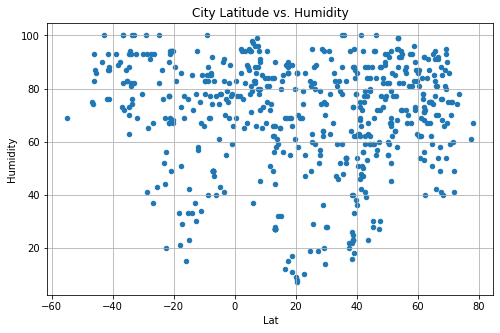

In [30]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,5),
              title="City Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

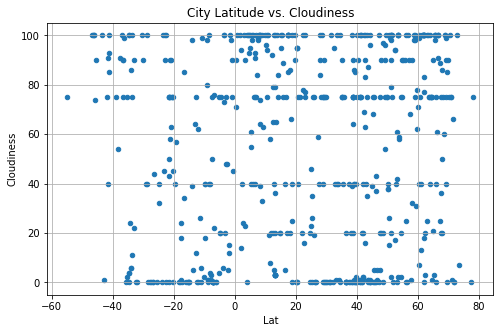

In [29]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,5),
              title="City Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

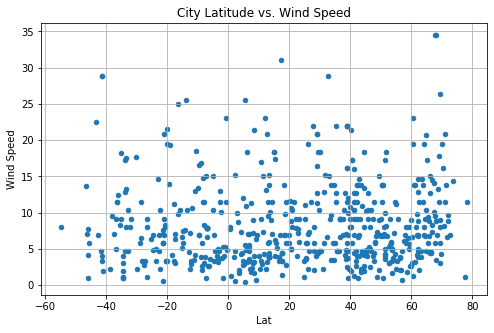

In [32]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,5),
              title="City Latitude vs. Wind Speed")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


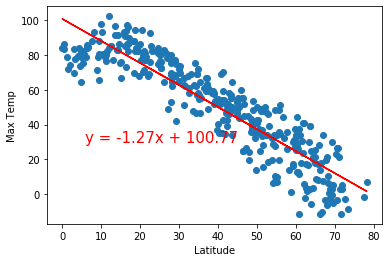

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


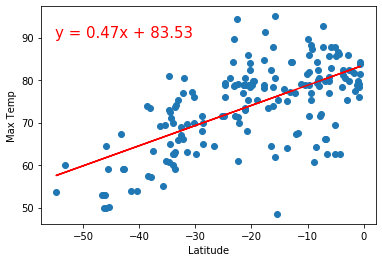

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


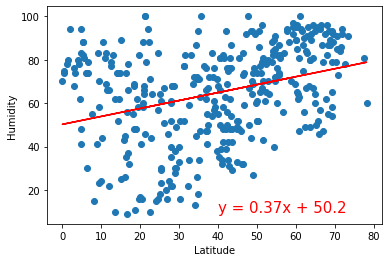

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


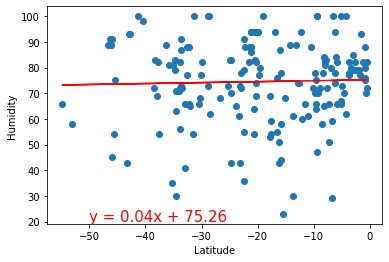

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


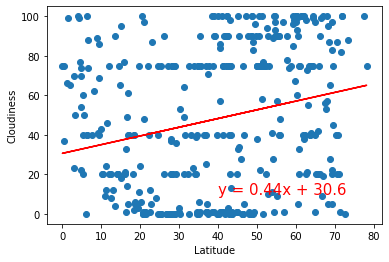

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


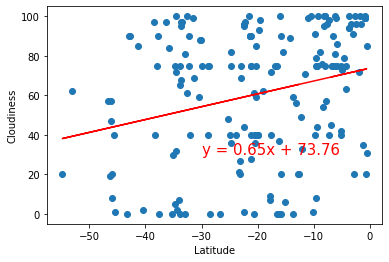

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


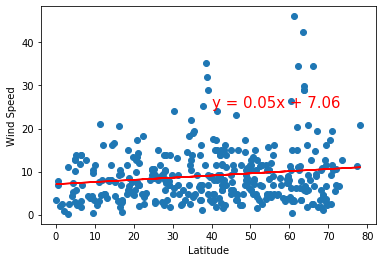

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


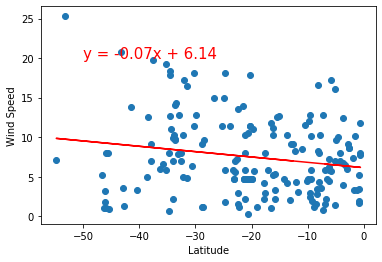